# Targets with low accuracy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.options.display.float_format = '{:.3f}'.format
plt.rcParams["figure.dpi"] = 150
sns.set(style='darkgrid')
from IPython.display import display
import warnings
warnings.simplefilter('ignore', UserWarning)
from pathlib import Path
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams["font.size"] = 15
plt.rcParams['figure.figsize'] = (6, 4)
from scipy import stats

In [2]:
data_dir = Path('../../../../../data/')
dataset_dir = data_dir / 'out' / 'dataset'
subset_name = 'target_subset_' + Path('.').resolve().parent.name
score_dir = dataset_dir / 'score' / 'subsets' / subset_name
assert score_dir.exists()
fig_dir = score_dir / 'fig' / 'accuracy'
fig_dir.mkdir(parents=True, exist_ok=True)
target_list = data_dir / 'interim' / f'{subset_name}.csv'
assert target_list.exists()

In [3]:
label_path = score_dir / 'label.csv'
label_df = pd.read_csv(label_path, index_col=0)
target_df = pd.read_csv(target_list, index_col=0)
df = pd.merge(label_df, target_df, left_on='Target', right_on='id', how='left')
df

,Model,TMscore,GDT_TS,GDT_HA,Global_LDDT,Mean_LDDT,pLDDT,pTMscore,Tolerance,ModelName,...,Length,id,resolution,releasedate,header,sequence,length,num_entry_in_cluster,num_entry_in_cluster_AF2_notInclude,is_similar_AF2
0,model_1_ptm_seed_0_rec_10_ens_1,0.981,0.980,0.919,0.910,0.901,0.955,0.900,0.032,model_1_ptm,...,158,6AN4_A,1.470,2019-04-17T00:00:00Z,>6an4_A mol:protein length:158 2-amino-4-hydr...,TVAYIAIGSNLASPLEQVNAALKALGDIPESHILTVSSFYRTPPLG...,158,90,5,True
1,model_1_ptm_seed_0_rec_10_ens_8,0.981,0.979,0.916,0.910,0.901,0.956,0.901,0.019,model_1_ptm,...,158,6AN4_A,1.470,2019-04-17T00:00:00Z,>6an4_A mol:protein length:158 2-amino-4-hydr...,TVAYIAIGSNLASPLEQVNAALKALGDIPESHILTVSSFYRTPPLG...,158,90,5,True
2,model_1_ptm_seed_0_rec_1_ens_1,0.981,0.980,0.917,0.909,0.901,0.944,0.895,20.749,model_1_ptm,...,158,6AN4_A,1.470,2019-04-17T00:00:00Z,>6an4_A mol:protein length:158 2-amino-4-hydr...,TVAYIAIGSNLASPLEQVNAALKALGDIPESHILTVSSFYRTPPLG...,158,90,5,True
3,model_1_ptm_seed_0_rec_1_ens_8,0.980,0.979,0.917,0.910,0.901,0.947,0.896,20.749,model_1_ptm,...,158,6AN4_A,1.470,2019-04-17T00:00:00Z,>6an4_A mol:protein length:158 2-amino-4-hydr...,TVAYIAIGSNLASPLEQVNAALKALGDIPESHILTVSSFYRTPPLG...,158,90,5,True
4,model_1_ptm_seed_0_rec_2_ens_1,0.981,0.979,0.919,0.911,0.903,0.948,0.897,0.172,model_1_ptm,...,158,6AN4_A,1.470,2019-04-17T00:00:00Z,>6an4_A mol:protein length:158 2-amino-4-hydr...,TVAYIAIGSNLASPLEQVNAALKALGDIPESHILTVSSFYRTPPLG...,158,90,5,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108595,model_5_seed_1_rec_7_ens_8,0.960,0.981,0.887,0.909,0.907,0.875,NaN,0.627,model_5,...,93,6Y24_A,1.860,2021-04-07T00:00:00Z,>6y24_A mol:protein length:93 Far upstream el...,SMQGNWNMGPPGGLQEFNFIVPTGKTGLIIGKGGETIKSISQQSGA...,93,1,1,False
108596,model_5_seed_1_rec_8_ens_1,0.960,0.981,0.887,0.910,0.907,0.876,NaN,0.339,model_5,...,93,6Y24_A,1.860,2021-04-07T00:00:00Z,>6y24_A mol:protein length:93 Far upstream el...,SMQGNWNMGPPGGLQEFNFIVPTGKTGLIIGKGGETIKSISQQSGA...,93,1,1,False
108597,model_5_seed_1_rec_8_ens_8,0.960,0.981,0.884,0.909,0.907,0.875,NaN,0.426,model_5,...,93,6Y24_A,1.860,2021-04-07T00:00:00Z,>6y24_A mol:protein length:93 Far upstream el...,SMQGNWNMGPPGGLQEFNFIVPTGKTGLIIGKGGETIKSISQQSGA...,93,1,1,False
108598,model_5_seed_1_rec_9_ens_1,0.959,0.981,0.887,0.908,0.906,0.876,NaN,0.492,model_5,...,93,6Y24_A,1.860,2021-04-07T00:00:00Z,>6y24_A mol:protein length:93 Far upstream el...,SMQGNWNMGPPGGLQEFNFIVPTGKTGLIIGKGGETIKSISQQSGA...,93,1,1,False


## Targets with low maximum GDT_TS

In [4]:
label = 'GDT_TS'
target_num = 20
gdtts_max_df = df.groupby('Target').apply(lambda x: x.loc[x[label].idxmax()]).sort_values(label)
display(gdtts_max_df.head(target_num))
sample_targets_low_max_gdtts = gdtts_max_df.head(target_num).index.to_list()

,Model,TMscore,GDT_TS,GDT_HA,Global_LDDT,Mean_LDDT,pLDDT,pTMscore,Tolerance,ModelName,...,Length,id,resolution,releasedate,header,sequence,length,num_entry_in_cluster,num_entry_in_cluster_AF2_notInclude,is_similar_AF2
Target,,,,,,,,,,,,,,,,,,,,,
6Z4U_A,model_2_seed_1_rec_10_ens_8,0.243,0.259,0.146,0.304,0.324,0.334,NaN,2.304,model_2,...,97,6Z4U_A,1.950,2020-11-25T00:00:00Z,>6z4u_A mol:protein length:97 Protein 9b,MDPKISEMHPALRLVDPQIQLAVTRMENAVGRDQNNVGPKVYPIIL...,97,4,4,False
6OAW_A,model_3_ptm_seed_0_rec_2_ens_1,0.609,0.411,0.257,NaN,NaN,0.571,0.467,10.342,model_3_ptm,...,393,6OAW_A,2.200,2019-03-27T00:00:00Z,>6oaw_A mol:protein length:393 WYL1,GMLIPPSTFLPKRDKNVPYIAEVQSIPLSPSAYSVIIKDKSIFETS...,393,2,2,False
7EL1_E,model_3_seed_0_rec_2_ens_8,0.487,0.474,0.347,0.415,0.415,0.455,NaN,4.775,model_3,...,100,7EL1_E,2.230,2021-01-13T00:00:00Z,>7el1_E mol:protein length:100 100AA,MKSVKYISNMSKQEKGYRVYVNVVNEDTDKGFLFPSVPKEVIENDK...,100,1,1,False
6P3X_A,model_2_seed_1_rec_5_ens_1,0.532,0.514,0.466,0.813,0.807,0.889,NaN,1.888,model_2,...,386,6P3X_A,2.410,2019-10-23T00:00:00Z,>6p3x_A mol:protein length:386 Apolipoprotein...,GPGGSGGMKPQIRNMVEPMDPRTFVSNFNNRPILSGLDTVWLCCEV...,386,16,12,True
7A56_A,model_1_ptm_seed_0_rec_9_ens_1,0.654,0.554,0.434,0.674,0.675,0.870,0.719,0.183,model_1_ptm,...,437,7A56_A,1.850,2021-04-14T00:00:00Z,>7a56_A mol:protein length:437 Envelopment po...,EWSHPQFEKGGKLTPKSINHPDIENYIAALQSDIANDLTMHYFKPL...,437,4,4,False
6EJQ_A,model_2_seed_0_rec_5_ens_8,0.559,0.587,0.464,0.844,0.840,0.755,NaN,3.167,model_2,...,141,6EJQ_A,2.300,2018-12-19T00:00:00Z,>6ejq_A mol:protein length:141 Terminase smal...,GSHMSVSFRDRVLKLYLLGFDPSEIAQTLSLDVKRKVTEEEVLHVL...,141,9,9,False
6D57_A,model_3_seed_1_rec_6_ens_1,0.658,0.621,0.488,NaN,NaN,0.839,NaN,5.259,model_3,...,161,6D57_A,1.810,2019-04-24T00:00:00Z,>6d57_A mol:protein length:161 Ferric uptake ...,GAMGMLIENVEYDVLLERFKKILRQGGLKYTKQREVLLKTLYHSDT...,161,4,2,True
6H3S_B,model_4_ptm_seed_0_rec_6_ens_1,0.823,0.652,0.465,0.792,0.788,0.858,0.707,0.352,model_4_ptm,...,421,6H3S_B,2.030,2019-03-20T00:00:00Z,>6h3s_B mol:protein length:421 Envelopment po...,EWSHPQFEKGGQETSINCKNIQSTQLTIEHLSKCMAFYQNKTSSPV...,421,2,2,False
6G44_A,model_4_ptm_seed_1_rec_10_ens_1,0.844,0.668,0.480,0.710,0.687,0.678,0.713,1.186,model_4_ptm,...,520,6G44_A,1.500,2018-07-04T00:00:00Z,>6g44_A mol:protein length:520 Putative major...,GAMGMNTPPELDTVLQAPYAYNWPTSKNVKIASRIGIPYSTFQTIQ...,520,6,6,False


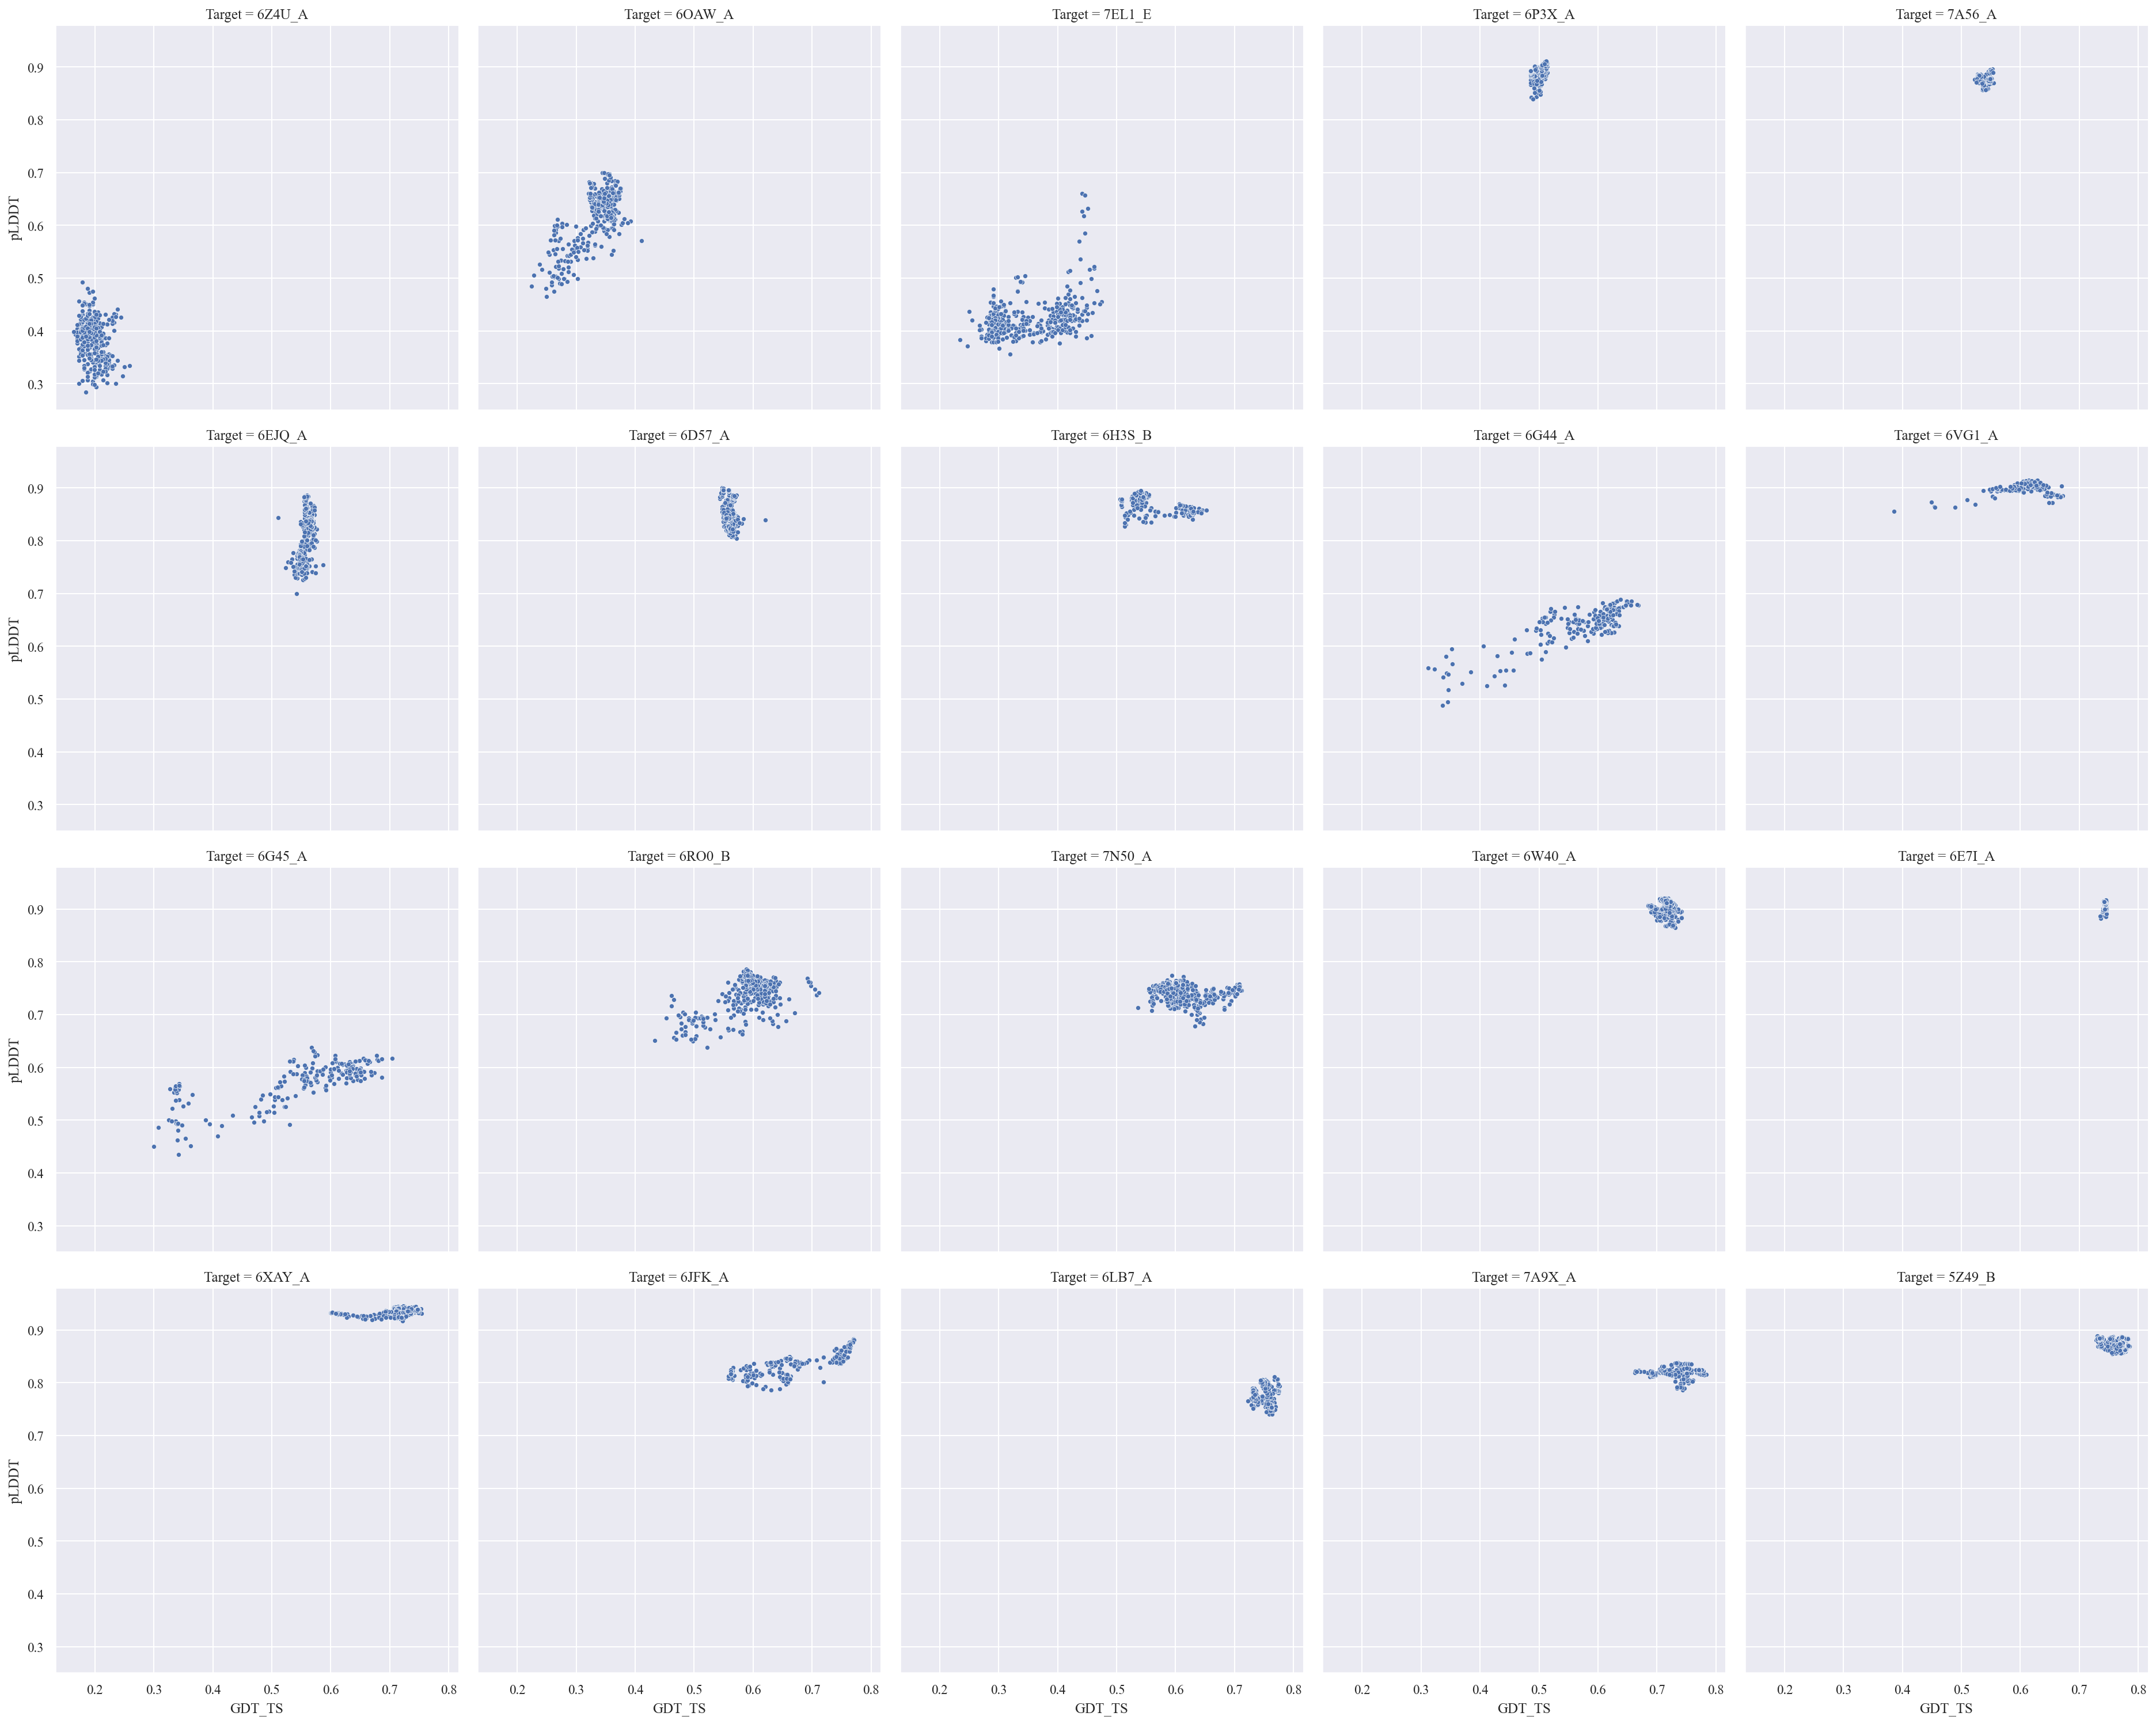

In [5]:
data = df.groupby('Target').filter(lambda x: x.name in sample_targets_low_max_gdtts)
method = 'pLDDT'
label = 'GDT_TS'
x, y = label, method
sns.relplot(data=data, x=x, y=y, kind='scatter', col='Target', col_wrap=5, col_order=sample_targets_low_max_gdtts, s=15)

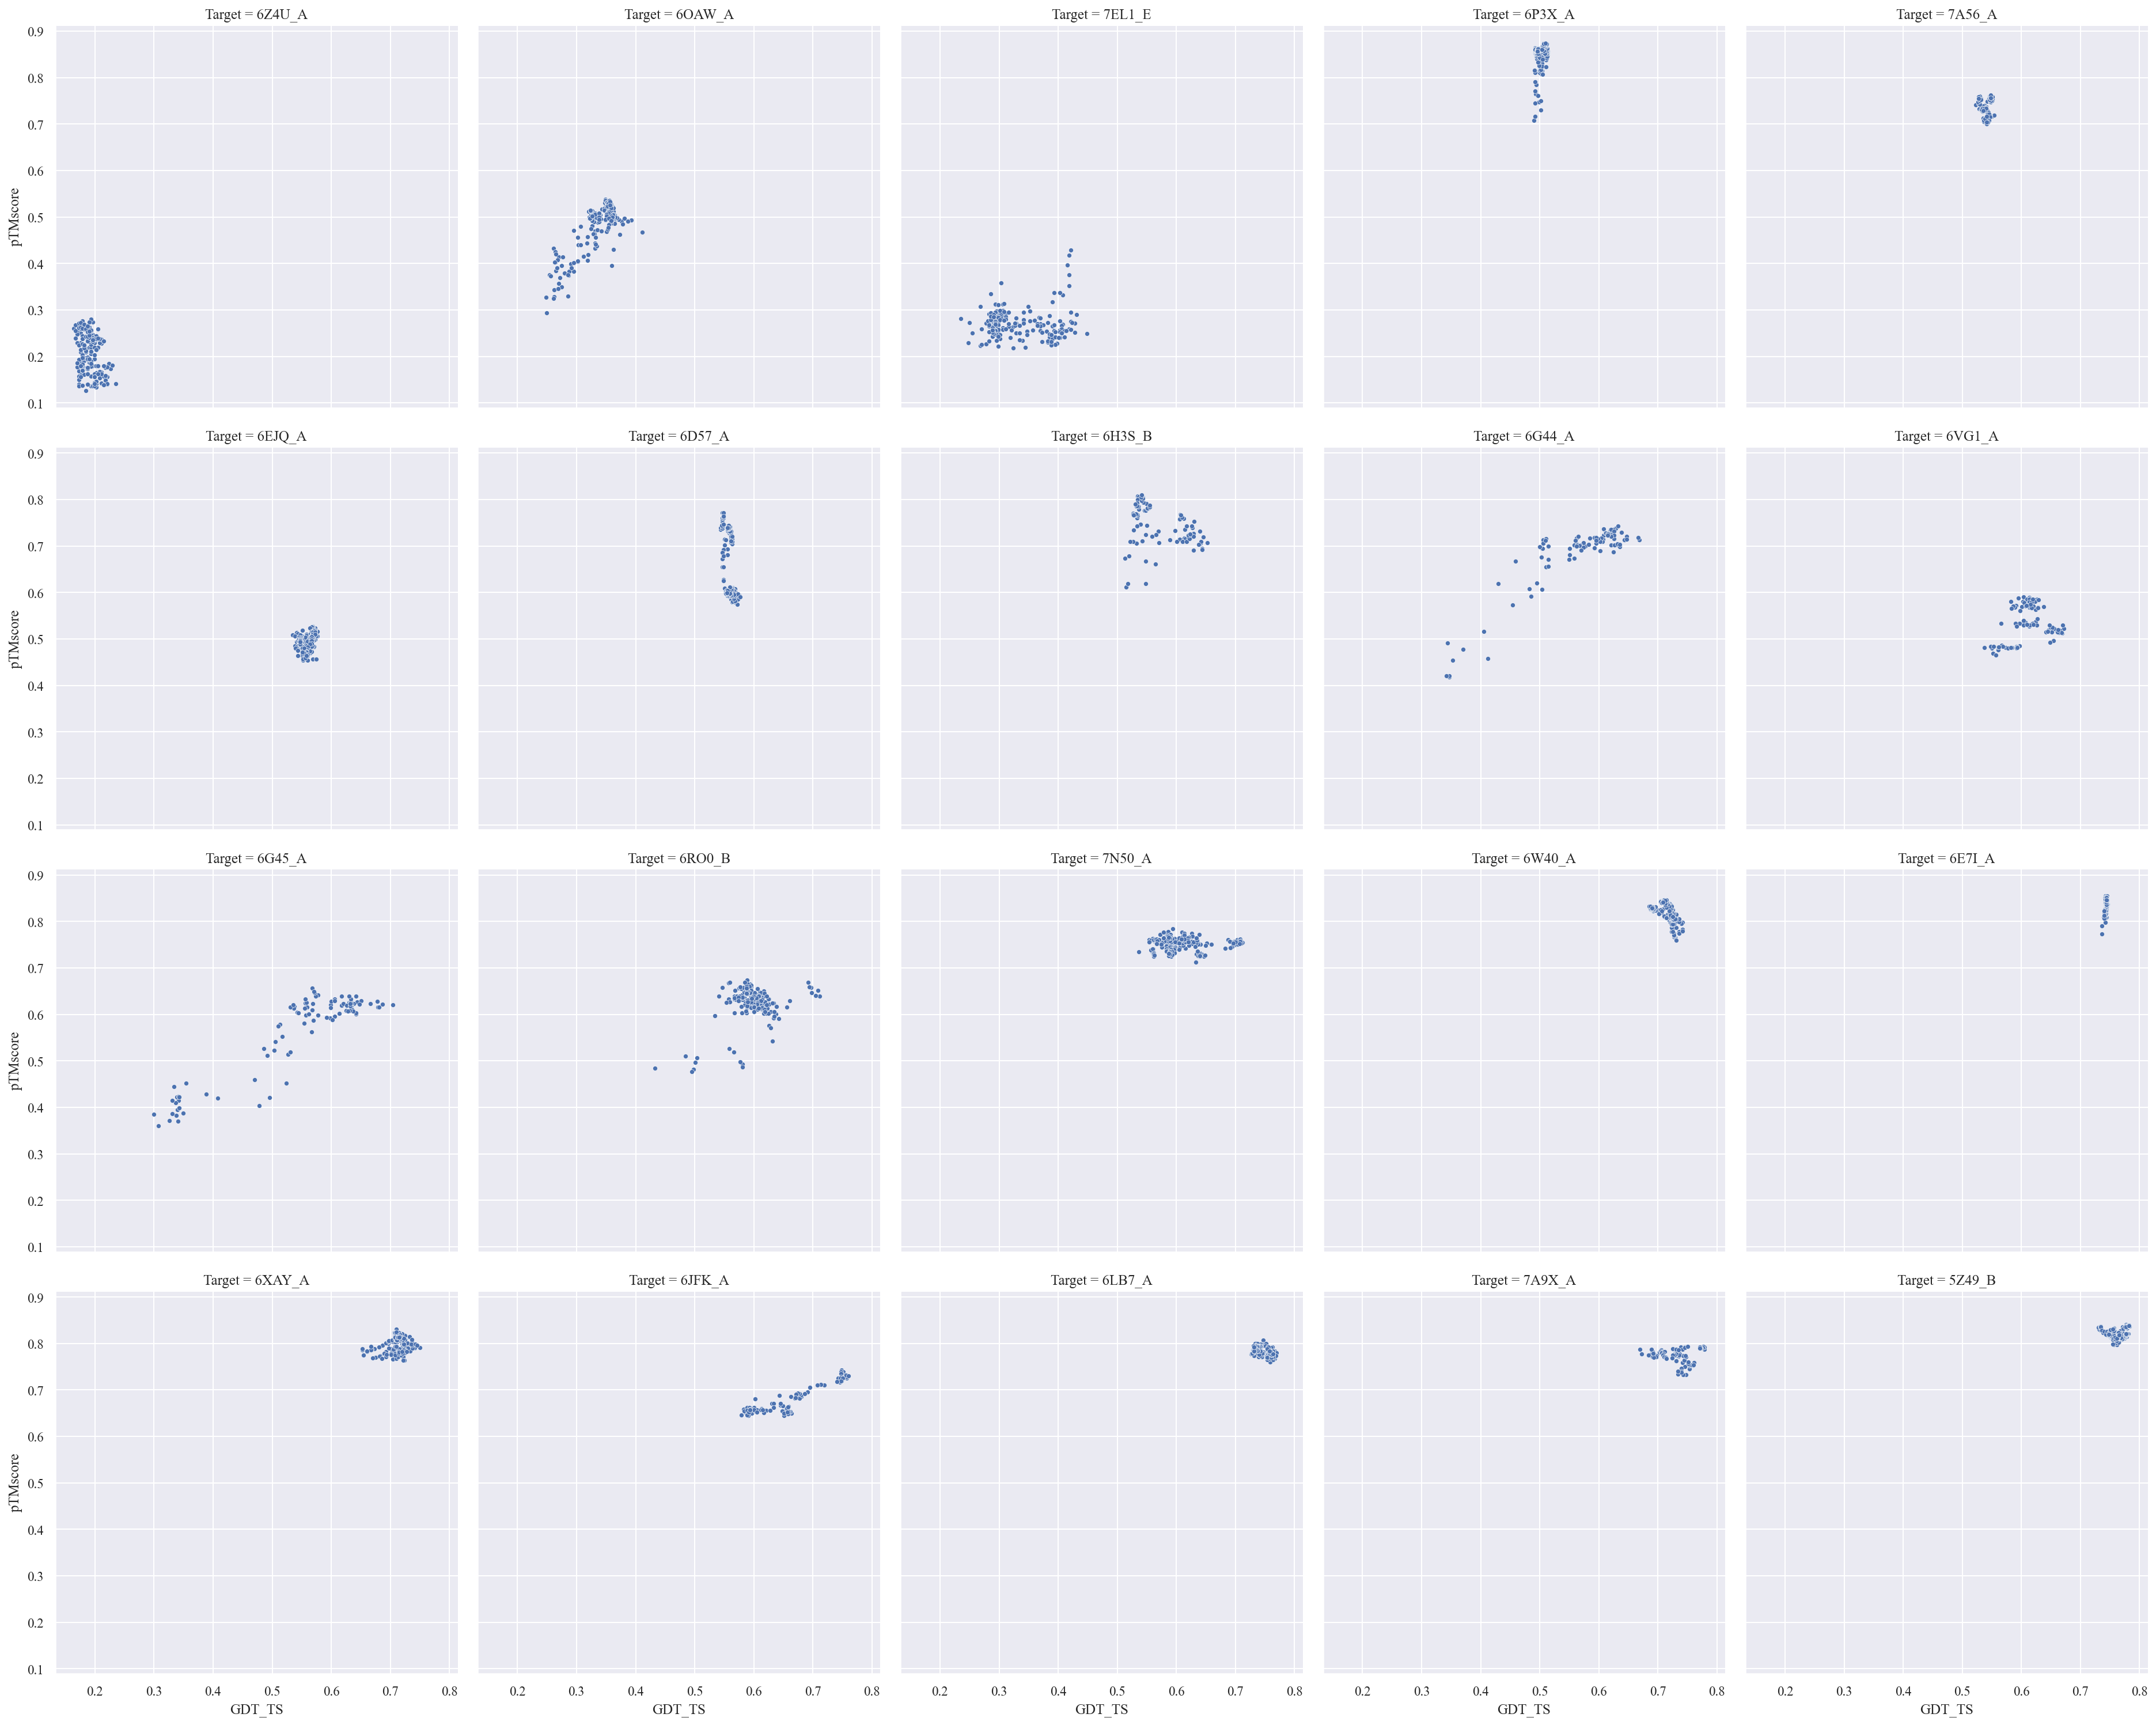

In [6]:
data = df.groupby('Target').filter(lambda x: x.name in sample_targets_low_max_gdtts)
method = 'pTMscore'
label = 'GDT_TS'
x, y = label, method
sns.relplot(data=data, x=x, y=y, kind='scatter', col='Target', col_wrap=5, col_order=sample_targets_low_max_gdtts, s=15)

## Targets with a low GDT_TS model

In [7]:
label = 'GDT_TS'
target_num = 20
gdtts_min_df = df.groupby('Target').apply(lambda x: x.loc[x[label].idxmin()]).sort_values(label)
display(gdtts_min_df.head(target_num))
sample_targets_with_low_gdtts = gdtts_min_df.head(target_num).index.to_list()

,Model,TMscore,GDT_TS,GDT_HA,Global_LDDT,Mean_LDDT,pLDDT,pTMscore,Tolerance,ModelName,...,Length,id,resolution,releasedate,header,sequence,length,num_entry_in_cluster,num_entry_in_cluster_AF2_notInclude,is_similar_AF2
Target,,,,,,,,,,,,,,,,,,,,,
6Z4U_A,model_1_ptm_seed_0_rec_6_ens_8,0.162,0.164,0.110,0.260,0.272,0.397,0.260,1.743,model_1_ptm,...,97,6Z4U_A,1.950,2020-11-25T00:00:00Z,>6z4u_A mol:protein length:97 Protein 9b,MDPKISEMHPALRLVDPQIQLAVTRMENAVGRDQNNVGPKVYPIIL...,97,4,4,False
6OAW_A,model_4_seed_0_rec_1_ens_1,0.309,0.224,0.169,NaN,NaN,0.485,NaN,43.992,model_4,...,393,6OAW_A,2.200,2019-03-27T00:00:00Z,>6oaw_A mol:protein length:393 WYL1,GMLIPPSTFLPKRDKNVPYIAEVQSIPLSPSAYSVIIKDKSIFETS...,393,2,2,False
7EL1_E,model_2_ptm_seed_1_rec_1_ens_1,0.233,0.235,0.161,0.275,0.278,0.383,0.281,20.833,model_2_ptm,...,100,7EL1_E,2.230,2021-01-13T00:00:00Z,>7el1_E mol:protein length:100 100AA,MKSVKYISNMSKQEKGYRVYVNVVNEDTDKGFLFPSVPKEVIENDK...,100,1,1,False
6G45_A,model_1_ptm_seed_1_rec_1_ens_1,0.418,0.300,0.222,0.465,0.482,0.450,0.385,44.711,model_1_ptm,...,610,6G45_A,2.500,2018-07-04T00:00:00Z,>6g45_A mol:protein length:610 Putative major...,GAMGMNTPPELDTVLQAPYAYNWPTSKNVKIASRIGIPYSTFQTIQ...,610,3,3,False
6G44_A,model_2_seed_1_rec_1_ens_1,0.477,0.312,0.226,0.527,0.527,0.560,NaN,41.444,model_2,...,520,6G44_A,1.500,2018-07-04T00:00:00Z,>6g44_A mol:protein length:520 Putative major...,GAMGMNTPPELDTVLQAPYAYNWPTSKNVKIASRIGIPYSTFQTIQ...,520,6,6,False
6Z5H_AAA,model_4_ptm_seed_1_rec_1_ens_1,0.422,0.352,0.301,0.619,0.632,0.683,0.445,49.993,model_4_ptm,...,628,6Z5H_AAA,2.300,2021-06-30T00:00:00Z,>6z5h_AAA mol:protein length:628 Exotoxin,MHHHHHHENLYFQGADESFNLWQECATRCTLDLAQGVRASQLDVAS...,628,4,2,True
5VTL_A,model_1_ptm_seed_1_rec_6_ens_1,0.428,0.356,0.283,0.451,0.459,0.490,0.470,5.194,model_1_ptm,...,210,5VTL_A,1.830,2018-08-08T00:00:00Z,>5vtl_A mol:protein length:210 Tb427.07.360- ...,QNTVSHVSAACLFSEALHGIPFGVKVLKALAAANVSDASKAREGCQ...,210,1,1,False
6VG1_A,model_1_seed_0_rec_2_ens_1,0.552,0.386,0.256,0.790,0.785,0.855,NaN,2.674,model_1,...,647,6VG1_A,2.000,2021-04-21T00:00:00Z,>6vg1_A mol:protein length:647 protocadherin ...,KTVRYRTYEEDEPGTVIGTLAEDLHLEGEGSFRLMKQFNNSLIHVR...,647,5,5,False
6EXU_A,model_2_seed_0_rec_2_ens_1,0.432,0.427,0.310,NaN,NaN,0.641,NaN,2.086,model_2,...,116,6EXU_A,1.410,2020-04-08T00:00:00Z,>6exu_A mol:protein length:116 Switch-activat...,LSPSSSPAKAQRTHLSLEEKIKLMRLVVRHKHELVDRKTSEFYAKI...,116,3,2,True


In [8]:
set(sample_targets_with_low_gdtts) - set(sample_targets_low_max_gdtts)

{'5VTL_A', '6EXU_A', '6GTZ_A', '6HLK_A', '6Z5H_AAA', '7LJ5_A'}

## Targets with low GDT_TS and high mean-LDDT

In [9]:
df.query('GDT_TS < 0.6 and Mean_LDDT > 0.8')['Target'].unique()

array(['6GTZ_A', '6P3X_A', '6H3S_B', '6XAY_A', '6VG1_A', '6EJQ_A'],
      dtype=object)